In [1]:
import numpy as np

In [2]:
a = np.array([1, 2, 3])

In [3]:
# help(np.ndim)
# a.reshape(-1, 1)
print(a, a.reshape(-1, 1))

[1 2 3] [[1]
 [2]
 [3]]


In [4]:
from Dataset import load_scg
signals, labels, duration, fs = load_scg(0.1, 'test')
# signals.shape, labels =

In [5]:
fs

100

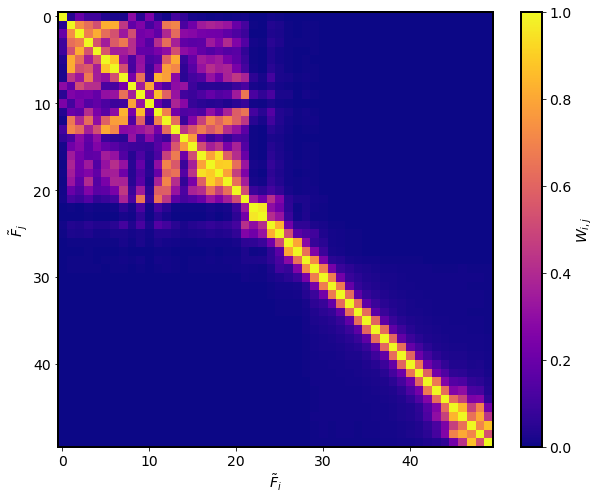

In [48]:
from algo_ssa import SSA
import matplotlib.pylab as plt
# Fiddle with figure settings here:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 14
plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams['axes.linewidth'] = 2

signal = signals[0]

ssa_signal = SSA(signal, 50)
ssa_signal.calc_wcorr()
ssa_signal.plot_wcorr()

In [25]:
# F_ssa_L5 = SSA(signal, 5)
# F_ssa_L5.components_to_df().plot()
# (F_ssa_L5.orig_TS + 1e-5).plot(alpha=0.4)
# plt.xlabel("$t$")
# plt.ylabel(r"$\tilde{F}_i(t)$")
# plt.title(r"$L=5$ for the Toy Time Series");
# plt.show()

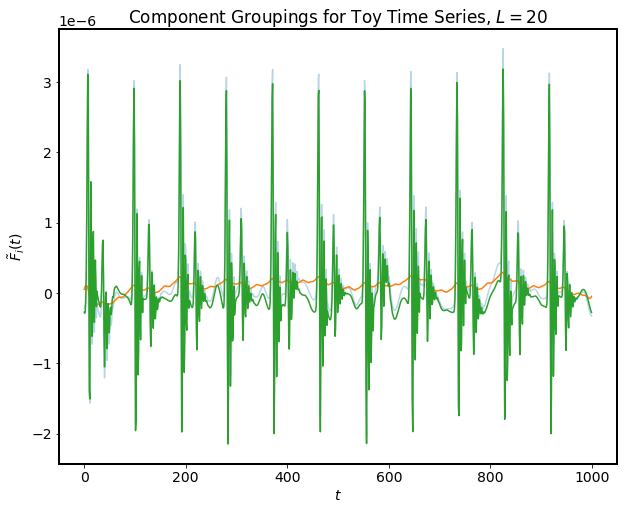

In [60]:
i = 3

(ssa_signal.orig_TS ).plot(alpha=0.3)
ssa_signal.reconstruct([0]).plot()
ssa_signal.reconstruct(slice(1, 50)).plot()
# ssa_signal.orig_TS.plot(alpha=0.4)

# ssa_signal.reconstruct(slice(1, 25)).plot()
# ssa_signal.reconstruct(slice(21, 50)).plot()

# F_ssa_L5.reconstruct(slice(4,20)).plot()
# F_ssa_L5.reconstruct(3).plot()
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title("Component Groupings for Toy Time Series, $L=20$");
# plt.legend([r"$\tilde{F}_0$",
#             r"$\tilde{F}_1+\tilde{F}_2+\tilde{F}_3$",
#             r"$\tilde{F}_4+ \ldots + \tilde{F}_{19}$",
#             r"$\tilde{F}_3$"]);

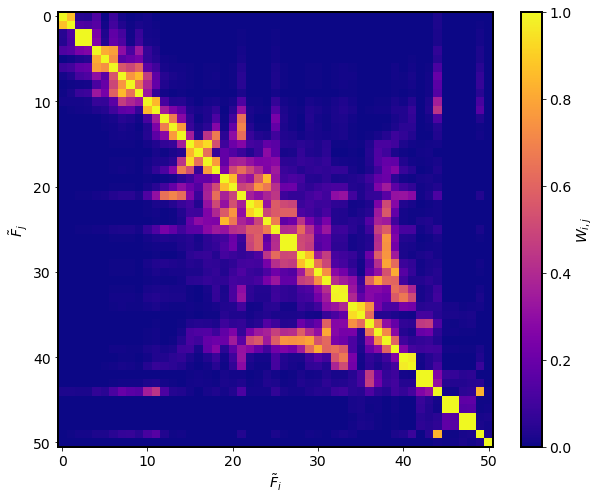

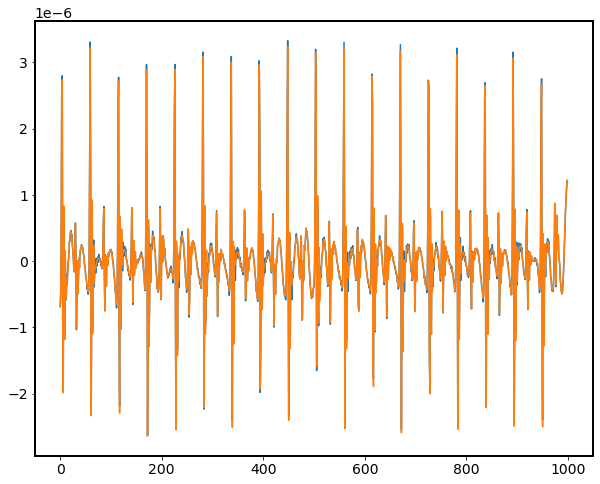

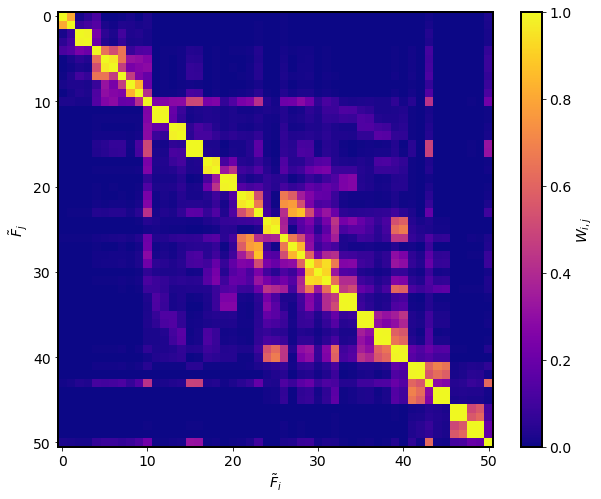

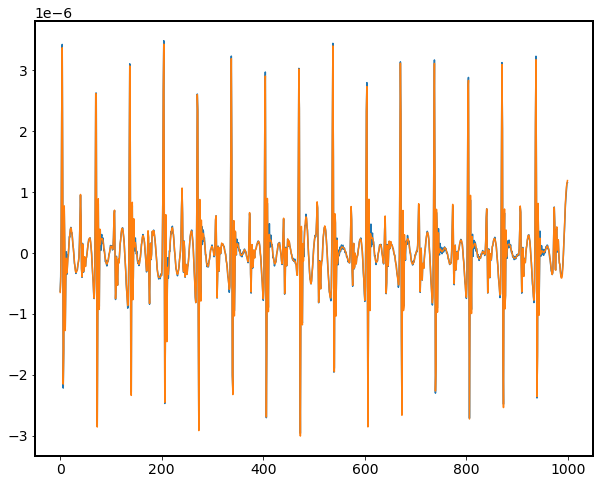

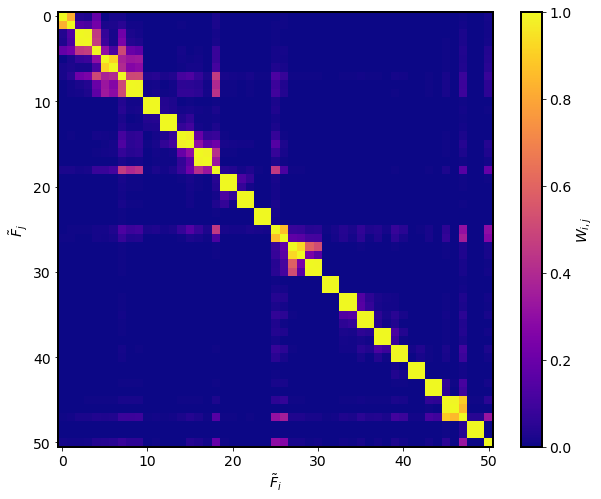

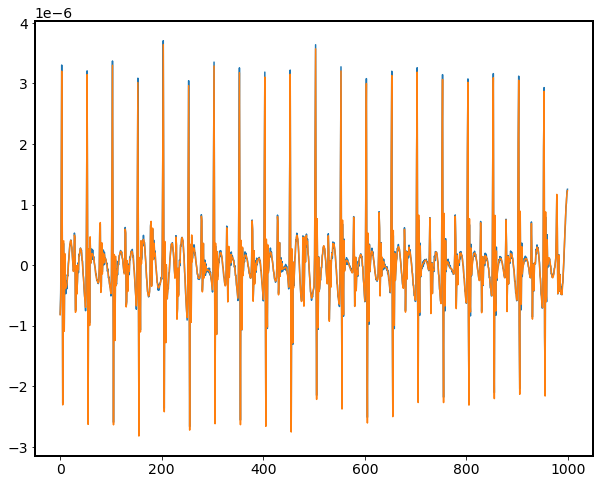

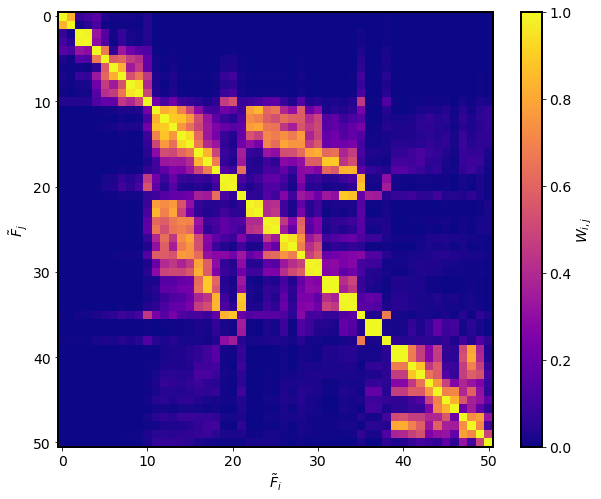

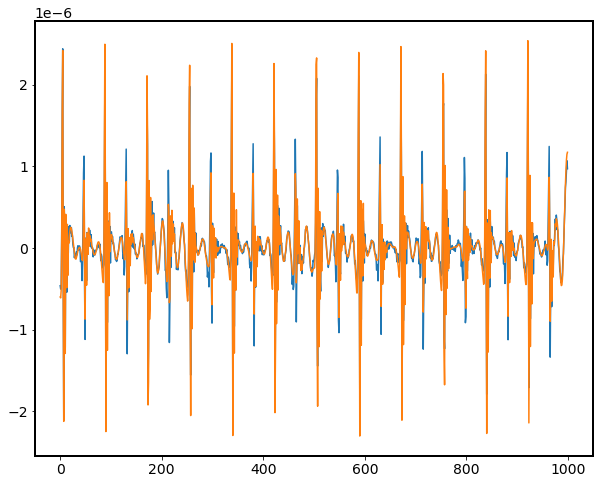

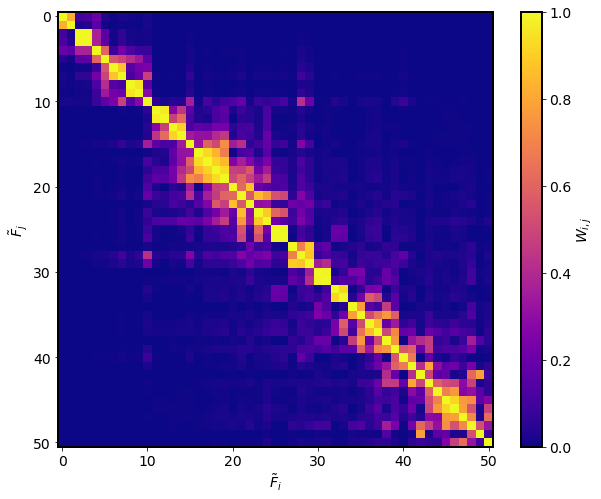

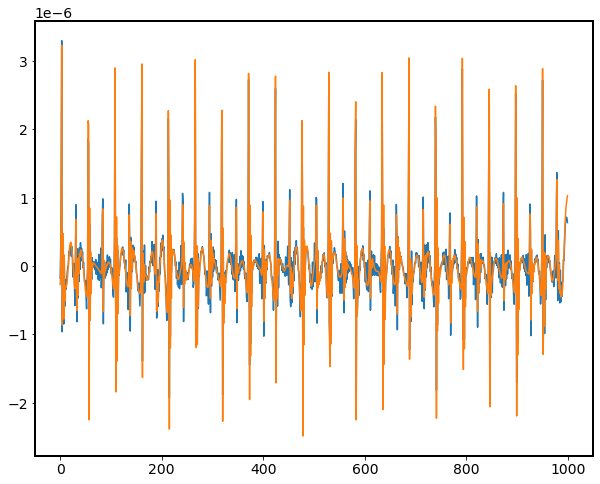

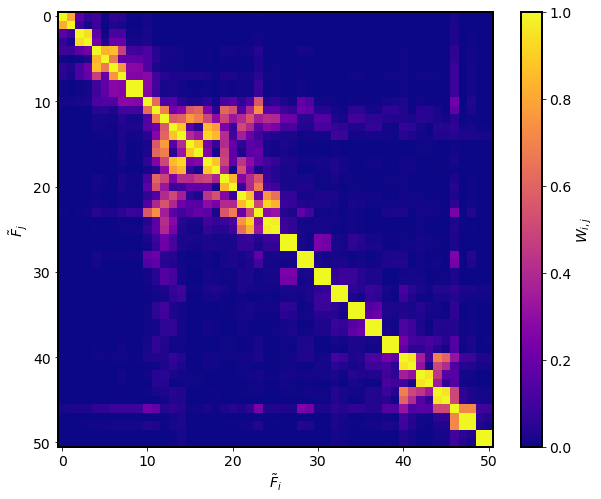

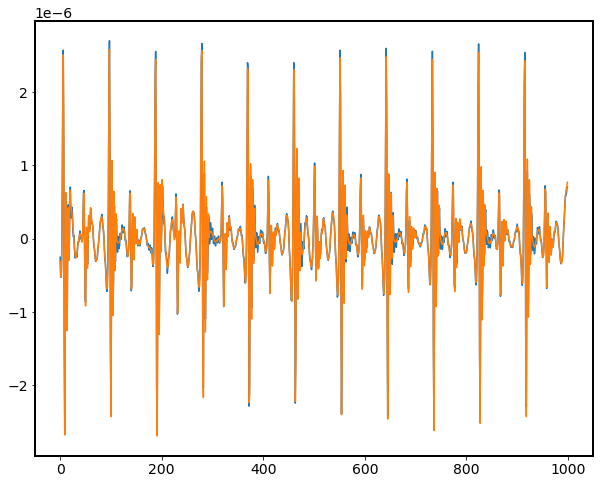

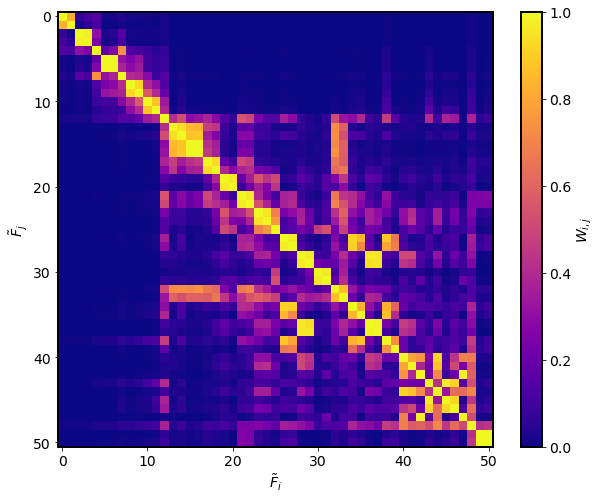

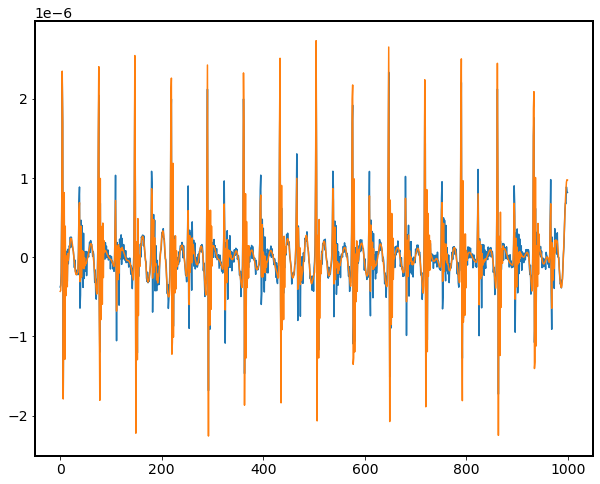

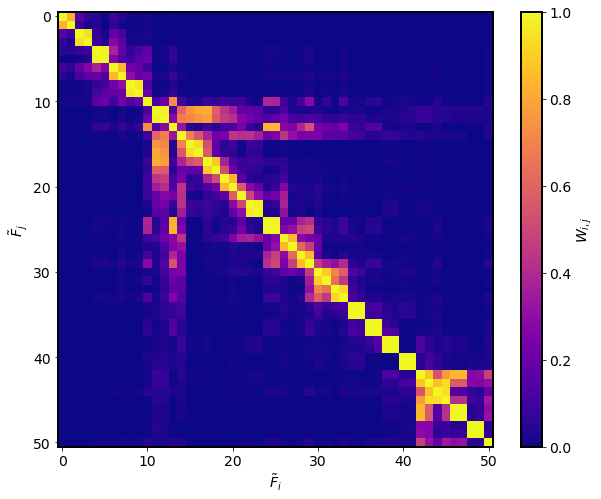

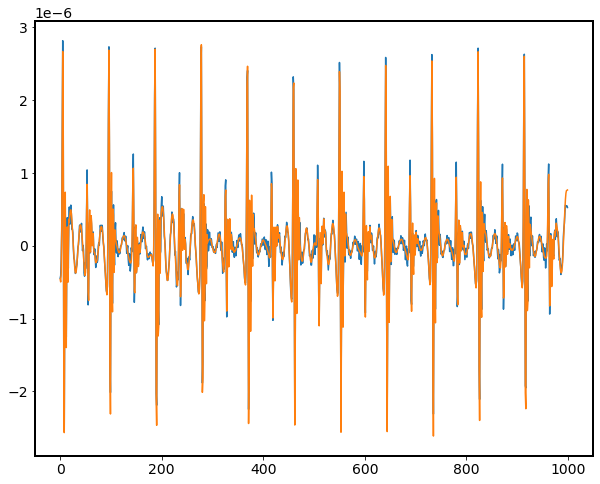

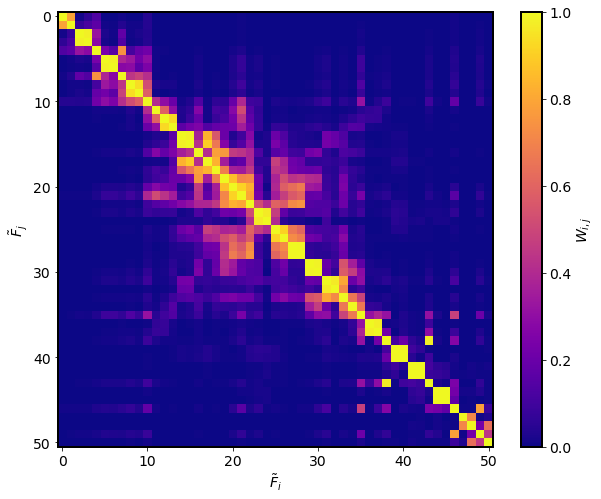

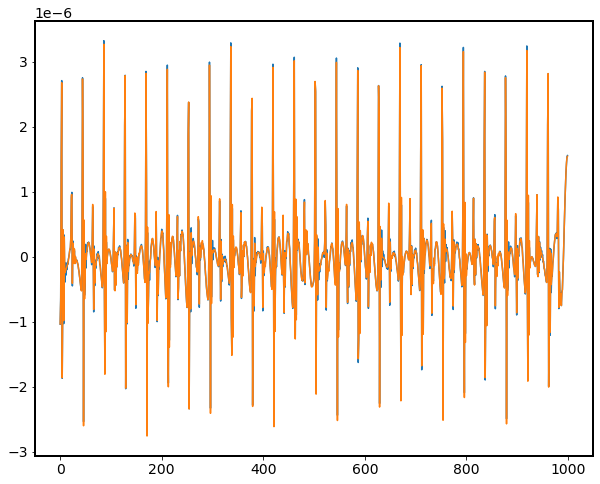

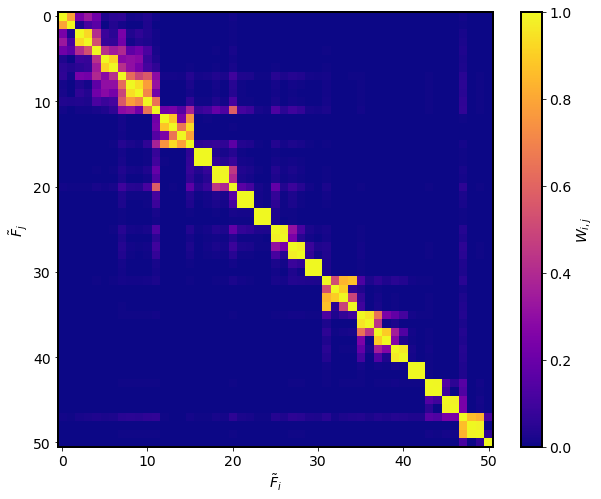

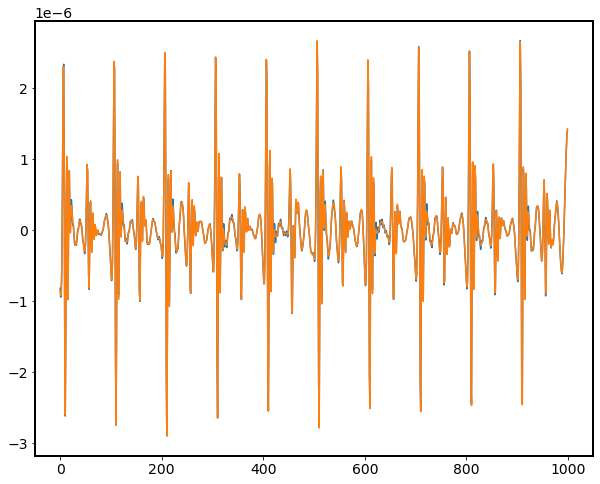

In [184]:
signals_8, labels_8, duration, fs = load_scg(0.8, 'train')
def find_point(Wcorr):
# def find_point():
    maxmean_i = 0
    target = 0
    alpha = 0.06
    for i in range(1, 16):
        maxmean = np.mean(Wcorr[slice(0, i), slice(0, i)]) + alpha * i
        print(i, maxmean, np.mean(Wcorr[slice(0, i), slice(0, i)]), alpha *  i)
        if maxmean > target:
            target = maxmean
            maxmean_i = i
    print(maxmean_i)
# find_point()

for i in range(10, 20):
    signal_8 = signals_8[i]
    ssa_signal_8 = SSA(signal_8, 100)
    ssa_signal_8.calc_wcorr()
    Wcorr_matrix = ssa_signal_8.Wcorr
    # find_point(Wcorr_matrix)
    # print(Wcorr_matrix)
    # break
    ssa_signal_8.plot_wcorr(0, 50)
    plt.show()
    # ssa_signal_8.orig_TS.plot(alpha=0.3)
    # ssa_signal_8.reconstruct(slice(0, 10)).plot()
    ssa_signal_8.reconstruct(slice(10, 50)).plot()
    ssa_signal_8.reconstruct(slice(10, 100)).plot()
    plt.show()

In [134]:
# signals_clean, _, _, _ = load_scg(0, 'train')
# plt.plot(signals_clean[0])

<AxesSubplot:>

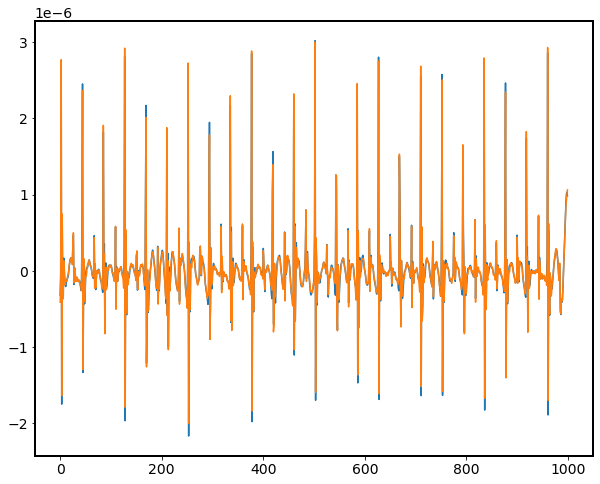

In [142]:
# ssa_signal_8.orig_TS.plot(alpha=0.3)
# print(slice(0, 2))

ssa_signal_8.reconstruct(slice(10, 100)).plot()
ssa_signal_8.reconstruct(slice(10, 70)).plot()
# plt.plot(signals_clean[1])

# ssa_signal_8.reconstruct(slice(10, 48)).plot()



<AxesSubplot:>

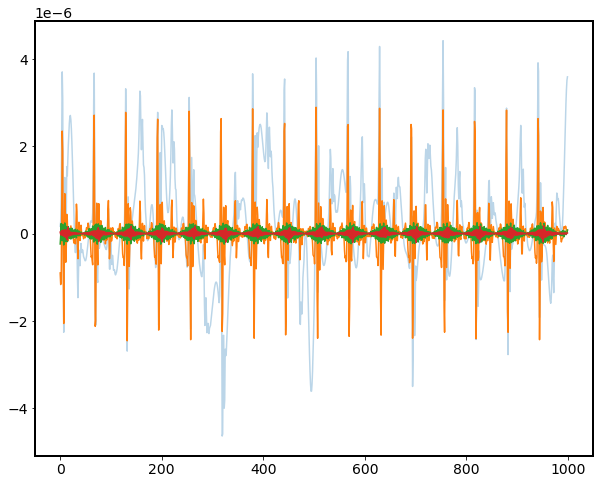

In [93]:
(ssa_signal_8.orig_TS).plot(alpha=0.3)
ssa_signal_8.reconstruct(slice(0, 7)).plot()
ssa_signal_8.reconstruct(slice(7, 27)).plot()
ssa_signal_8.reconstruct(slice(27, 31)).plot()
ssa_signal_8.reconstruct(slice(31, 50)).plot()
